<a href="https://colab.research.google.com/github/MarianaWu01/lingyiwu.github.com/blob/main/HotelBooking_Demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/content/hotel_bookings.csv")
data.head()

missing_values = data.isnull().sum()
print("Missing Value：")
print(missing_values)

data.dropna(inplace=True)

duplicate_rows = data.duplicated().sum()
print("Duplicated rows：", duplicate_rows)
data.drop_duplicates(inplace=True)

Missing Value：
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
c

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           189 non-null    object 
 1   is_canceled                     189 non-null    int64  
 2   lead_time                       189 non-null    int64  
 3   arrival_date_year               189 non-null    int64  
 4   arrival_date_month              189 non-null    object 
 5   arrival_date_week_number        189 non-null    int64  
 6   arrival_date_day_of_month       189 non-null    int64  
 7   stays_in_weekend_nights         189 non-null    int64  
 8   stays_in_week_nights            189 non-null    int64  
 9   adults                          189 non-null    int64  
 10  children                        189 non-null    float64
 11  babies                          189 non-null    int64  
 12  meal                            189

In [278]:
data.nunique()

hotel                              2
is_canceled                        2
lead_time                         50
arrival_date_year                  3
arrival_date_month                12
arrival_date_week_number          38
arrival_date_day_of_month         29
stays_in_weekend_nights            8
stays_in_week_nights              13
adults                             3
children                           3
babies                             1
meal                               4
country                           18
market_segment                     6
distribution_channel               4
is_repeated_guest                  2
previous_cancellations             2
previous_bookings_not_canceled     6
reserved_room_type                 5
assigned_room_type                 9
booking_changes                    7
deposit_type                       3
agent                             28
company                           46
days_in_waiting_list               1
customer_type                      4
a

In [279]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [280]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000
mean,0.084656,33.883598,2015.486772,37.555556,11.121693,1.439153,4.365079,1.423280,0.042328,0.0,0.079365,0.010582,0.169312,1.312169,207.306878,260.153439,0.0,64.804180,0.100529,0.222222
std,0.279109,50.797022,0.740963,13.317854,7.735728,1.481356,3.526352,0.526619,0.249055,0.0,0.271026,0.145479,0.766943,1.297670,109.707837,107.122781,0.0,40.186506,0.301503,0.577350
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2015.000000,33.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,24.000000,2015.000000,45.000000,9.000000,1.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.000000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


In [281]:
to_drop = ['country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date','hotel']
X=data.drop(to_drop,axis=1)
X.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2392,0,6,2015,October,42,11,2,0,2,0.0,...,0,0,0,1,240.0,113.0,0,82.0,1,1
2697,0,24,2015,October,44,26,7,15,1,0.0,...,0,0,0,2,185.0,281.0,0,52.2,0,0
2867,0,24,2015,November,45,3,0,3,2,0.0,...,0,0,0,1,334.0,281.0,0,48.0,0,0
2877,0,24,2015,November,45,3,2,10,1,0.0,...,0,0,0,2,328.0,281.0,0,40.0,0,0
2878,0,24,2015,November,45,3,3,10,2,0.0,...,0,0,0,2,326.0,281.0,0,48.0,0,0


In [282]:
cat_cols=X.columns[X.dtypes == "object"]
num_cols=X.columns[(X.dtypes == "float64")|(X.dtypes =="int64")]

In [283]:
num_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [284]:
cat_cols

Index(['arrival_date_month', 'meal'], dtype='object')

In [285]:
from sklearn import model_selection
y = data['is_canceled']
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,stratify = y,random_state=1)
print("train data has"+ str(X_train.shape[0])+"observation with"+ str(X_train.shape[1])+ "features")
print("test data has"+str(X_test.shape[0])+"observation with"+str(X_test.shape[1])+ "features")

train data has141observation with22features
test data has48observation with22features


In [286]:
data_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Offline TA/TO,market_segment_Online TA
0,Resort Hotel,-0.304997,0.056076,-0.699663,November,0.631829,0.071093,-0.927984,-0.646335,-0.755911,...,-0.704206,-0.382546,-0.401394,Check-Out,2015-11-14,0.0,1.0,0.0,0.0,0.0
1,Resort Hotel,-0.304997,4.598244,2.003144,June,-0.922441,0.194848,0.387048,0.192314,1.181970,...,0.822928,-0.382546,-0.401394,Check-Out,2017-06-20,0.0,0.0,0.0,1.0,0.0
2,City Hotel,-0.304997,-0.712968,-0.699663,August,-0.286603,-0.176417,-0.270468,-0.925884,1.181970,...,1.267921,-0.382546,-0.401394,Check-Out,2015-08-12,0.0,0.0,0.0,0.0,1.0
3,Resort Hotel,-0.304997,-0.592805,2.003144,January,-2.335414,1.556154,-0.927984,-0.925884,-0.755911,...,-0.527220,-0.382546,-0.401394,Check-Out,2017-01-25,0.0,0.0,0.0,0.0,1.0
4,Resort Hotel,-0.304997,-0.688935,0.651741,July,-0.639846,-0.300172,-0.927984,-0.925884,1.181970,...,4.605366,-0.382546,-0.401394,Check-Out,2016-07-10,0.0,0.0,1.0,0.0,0.0


In [287]:
from sklearn.preprocessing import OneHotEncoder
def OneHotEncoding(df,enc,categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(),columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True),transformed],axis=1).drop(categories,axis=1)

categories = ["arrival_date_month"]
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train=OneHotEncoding(X_train,enc_ohe,categories)
X_test=OneHotEncoding(X_test,enc_ohe,categories)

In [288]:
from sklearn.preprocessing import OrdinalEncoder
categories_order = [['FB', 'HB', 'BB','SC']]
enc_oe = OrdinalEncoder(categories=categories_order)
enc_oe.fit(X_train[["meal"]])

X_train["meal_encoded"] = enc_oe.transform(X_train[["meal"]])
X_test["meal_encoded"] = enc_oe.transform(X_test[["meal"]])

In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train[num_cols])
data_train[num_cols] = scaler.transform(data_train[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])

In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [292]:
data_train_encoded = pd.get_dummies(data_train, columns=["arrival_date_month","meal"])
data_test_encoded = pd.get_dummies(data_test, columns=["arrival_date_month","meal"])
encoded_columns = data_train_encoded.columns
print(encoded_columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
    

In [298]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train_processed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [300]:
X_test_processed = X_test.drop(columns=['meal'])
predictions = classifier_logistic.predict(X_test_processed)

In [304]:
X_test_processed = X_test.drop(columns=['meal'])
score = classifier_logistic.score(X_test_processed, y_test)
print("Accuracy on test set:", score)

Accuracy on test set: 0.8541666666666666


In [305]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
  print("Best score:"+str(gs.best_score_))
  print("Best parameters set:")
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(param_name+":"+str(best_parameters[param_name]))

In [309]:
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_test_processed, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [310]:
print_grid_search_metrics(Grid_LR)

Best score:0.9177777777777777
Best parameters set:
C:0.01
penalty:l2


In [311]:
best_LR_model = Grid_LR.best_estimator_

In [318]:
best_LR_model.score(X_test_processed,y_test)

0.9166666666666666

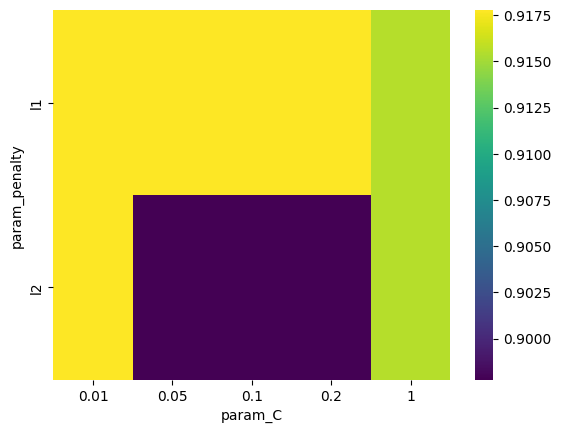

In [319]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index="param_penalty",columns="param_C",values="mean_test_score")
          )
_ =sns.heatmap(res, cmap="viridis",color="red")

In [321]:
parameters = {
    "n_neighbors":[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
X_train_processed = X_train.drop(columns=['meal'])
Grid_KNN.fit(X_train_processed,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [322]:
print_grid_search_metrics(Grid_KNN)

Best score:0.9150246305418721
Best parameters set:
n_neighbors:7


In [323]:
best_KNN_model=Grid_KNN.best_estimator_

In [324]:
parameters = {
    "n_estimators":[60,80,100],
    "max_depth":[1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
Grid_RF.fit(X_train_processed,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [325]:
print_grid_search_metrics(Grid_RF)

Best score:0.9647783251231526
Best parameters set:
max_depth:5
n_estimators:60


In [326]:
best_RF_model = Grid_RF.best_estimator_

In [327]:
best_RF_model

RandomForestClassifier(max_depth=5, n_estimators=60)

In [328]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier,cm):
  tn=cm[0][0]
  fp=cm[0][1]
  fn=cm[1][0]
  tp=cm[1][1]
  accuracy = (tp+tn)/(tp+fp+fn+tn+0.0)
  precision = tp/(tp+fp+0.0)
  recall= tp/(tp+fn+0.0)
  print(classifier)
  print("Accuracy is" + str(accuracy))
  print("precision is" + str(precision))
  print("recall is " + str(recall))
  print()

In [329]:
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [332]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test_processed))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test_processed))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test_processed)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is0.9791666666666666
precision is1.0
recall is 0.75

Logistic Regression
Accuracy is0.9166666666666666
precision isnan
recall is 0.0

K nearest neighbor
Accuracy is0.9166666666666666
precision isnan
recall is 0.0



<ipython-input-328-ac5c1f3f75c2>:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp+0.0)


In [333]:
def draw_confusion_matrices(confusion_matricies):
  class_names = ["Not","Churn"]
  for cm in confusion_matrices:
    classifier, cm = cm[0],cm[1]
    cal_evaluation(classifier,cm)

In [337]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_rf = best_RF_model.predict_proba(X_test_processed)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [338]:
best_RF_model.predict_proba(X_test_processed)

array([[0.99583158, 0.00416842],
       [0.89324314, 0.10675686],
       [0.89944444, 0.10055556],
       [0.91198423, 0.08801577],
       [0.95608406, 0.04391594],
       [0.95608406, 0.04391594],
       [0.96303186, 0.03696814],
       [0.99764023, 0.00235977],
       [0.98088384, 0.01911616],
       [0.9890599 , 0.0109401 ],
       [0.97832574, 0.02167426],
       [0.96108197, 0.03891803],
       [0.98050505, 0.01949495],
       [0.98143764, 0.01856236],
       [0.9393484 , 0.0606516 ],
       [0.99155579, 0.00844421],
       [0.97608753, 0.02391247],
       [0.92858362, 0.07141638],
       [0.29974248, 0.70025752],
       [0.82808141, 0.17191859],
       [0.99027581, 0.00972419],
       [0.45463654, 0.54536346],
       [0.9133699 , 0.0866301 ],
       [0.91104847, 0.08895153],
       [0.99504294, 0.00495706],
       [0.98799129, 0.01200871],
       [0.90027343, 0.09972657],
       [0.98013954, 0.01986046],
       [0.92435516, 0.07564484],
       [0.97970684, 0.02029316],
       [0.

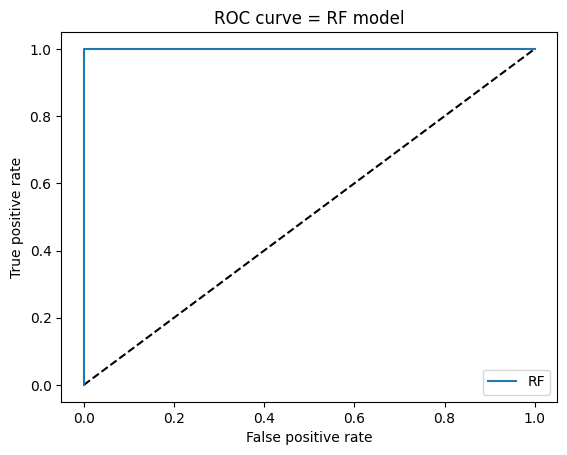

In [339]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr_rf, tpr_rf,label="RF")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve = RF model")
plt.legend(loc = "best")
plt.show()

In [340]:
from sklearn import metrics
metrics.auc(fpr_rf,tpr_rf)

1.0

In [342]:
y_pred_lr=best_LR_model.predict_proba(X_test_processed)[:,1]
fpr_lr,tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [344]:
best_LR_model.predict_proba(X_test_processed)

array([[9.87239133e-01, 1.27608671e-02],
       [8.47691625e-01, 1.52308375e-01],
       [8.94441465e-01, 1.05558535e-01],
       [9.77802243e-01, 2.21977574e-02],
       [8.64704627e-01, 1.35295373e-01],
       [8.64704627e-01, 1.35295373e-01],
       [9.80547171e-01, 1.94528286e-02],
       [9.13940659e-01, 8.60593412e-02],
       [9.05397922e-01, 9.46020783e-02],
       [9.46861640e-01, 5.31383598e-02],
       [8.91401040e-01, 1.08598960e-01],
       [8.46372308e-01, 1.53627692e-01],
       [9.21034863e-01, 7.89651375e-02],
       [9.41192245e-01, 5.88077548e-02],
       [9.35711095e-01, 6.42889049e-02],
       [9.65349997e-01, 3.46500032e-02],
       [9.34013106e-01, 6.59868936e-02],
       [9.38334315e-01, 6.16656848e-02],
       [8.25637381e-01, 1.74362619e-01],
       [8.43723225e-01, 1.56276775e-01],
       [9.10683645e-01, 8.93163547e-02],
       [8.96863190e-01, 1.03136810e-01],
       [8.57051100e-01, 1.42948900e-01],
       [8.61150640e-01, 1.38849360e-01],
       [9.615460

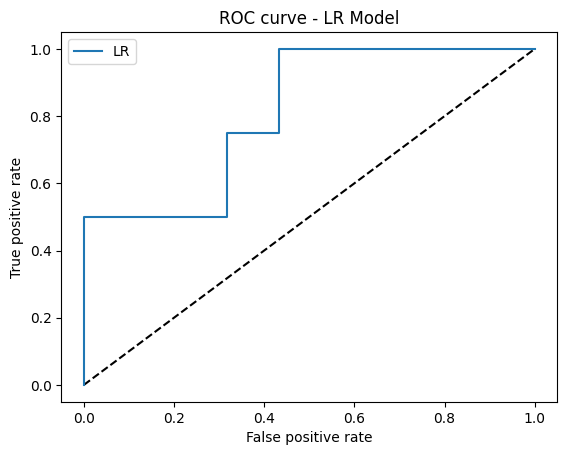

In [345]:
plt.figure(1)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr_lr,tpr_lr,label = "LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve - LR Model")
plt.legend(loc="best")
plt.show()

In [346]:
metrics.auc(fpr_lr,tpr_lr)

0.8125

In [352]:
forest = RandomForestClassifier()
forest.fit(X_train_processed, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_train_processed.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
is_canceled : 0.5446
lead_time : 0.0924
agent : 0.0475
arrival_date_week_number : 0.0375
stays_in_weekend_nights : 0.0329
booking_changes : 0.0322
arrival_date_day_of_month : 0.0316
adr : 0.0275
adults : 0.027
stays_in_week_nights : 0.0217
arrival_date_month_April : 0.0181
company : 0.0159
meal_encoded : 0.0149
arrival_date_month_June : 0.0103
is_repeated_guest : 0.0082
arrival_date_month_May : 0.0076
arrival_date_year : 0.0064
arrival_date_month_November : 0.0056
required_car_parking_spaces : 0.0049
total_of_special_requests : 0.0033
arrival_date_month_January : 0.0029
previous_bookings_not_canceled : 0.0025


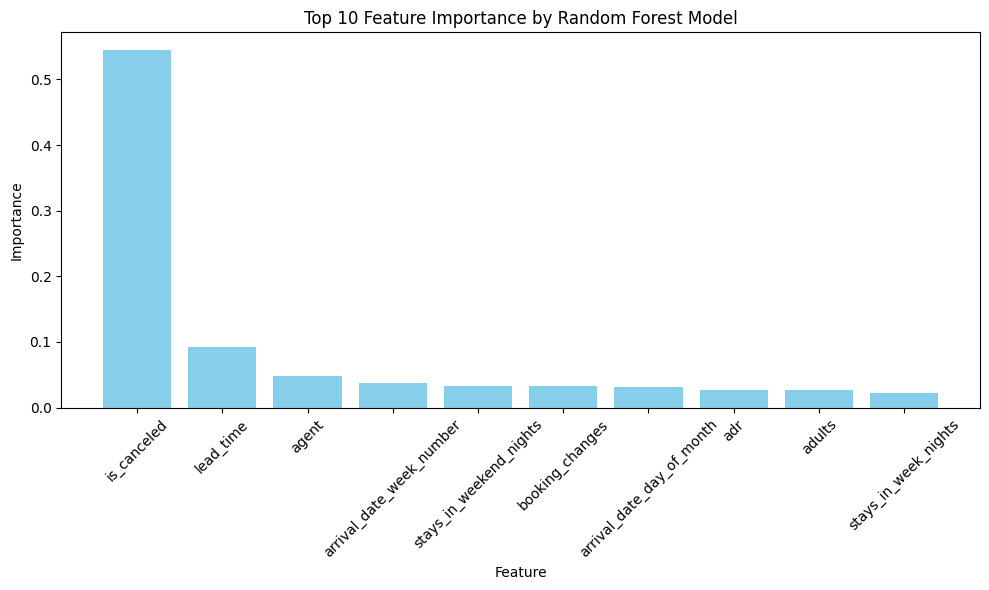

In [358]:
import matplotlib.pyplot as plt
top_features = 10
feature_names = X_train_processed.columns[indices][:top_features]
importances = importances[:top_features]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, color='skyblue', align='center')
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance by Random Forest Model')
plt.tight_layout()
plt.show()